# IBM 推荐系统



## 目录

I. [探索性数据分析](#Exploratory-Data-Analysis)<br>
II.[基于排名的推荐方法](#Rank)<br>
III.[基于用户-用户的协同过滤](#User-User)<br>
IV.[基于内容的推荐方法（选修内容）](#Content-Recs)<br>
V. [矩阵分解](#Matrix-Fact)<br>
VI.[其他内容和总结](#conclusions)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle
from sklearn.metrics import f1_score

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

In [2]:
#便于查看文本内容
pd.set_option('max_colwidth',500)

#交互显示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [4]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch Queue Queue __count__/__total__ Find out why CloseDEMO: DETECT MALFUNCTIONING IOT SENSORS WITH STREAMING ANALYTICS\r\nIBM AnalyticsLoading...\r\n\r\nUnsubscribe from IBM Analytics? Cancel UnsubscribeWorking...\r\n\r\nSubscribe Subscribed Unsubscribe ...",Detect bad readings in real time using Python and Streaming Analytics.,Detect Malfunctioning IoT Sensors with Streaming Analytics,Live,0
1,"No Free Hunch Navigation * kaggle.com\r\n\r\n * kaggle.com\r\n\r\nCommunicating data science: A guide to presenting your work 4COMMUNICATING DATA SCIENCE: A GUIDE TO PRESENTING YOUR WORK\r\nMegan Risdal | 06.29.2016\r\n\r\nSee the forest, see the trees . Here lies the challenge in both performing and presenting an analysis. As\r\ndata scientists, analysts, and machine learning engineers faced with fulfilling\r\nbusiness objectives, we find ourselves bridging the gap between The Two Cultures ...","See the forest, see the trees. Here lies the challenge in both performing and presenting an analysis. As data scientists, analysts, and machine learning engineers faced with fulfilling business obj…",Communicating data science: A guide to presenting your work,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Paths\r\n * Courses * Our Courses\r\n * Partner Courses\r\n \r\n \r\n * Badges * Our Badges\r\n * BDU Badge Program\r\n \r\n \r\n * Watson Student Advisor\r\n\r\n * \r\n\r\nBLOG\r\nWelcome to the BDUBlog .SUBCRIBE VIA FEED\r\nRSS - Posts\r\n\r\nRSS - Comments\r\n\r\nSUBSCRIBE VIA EMAIL\r\nEnter your email address to subscribe to this blog and receive notifications of\r\nnew posts by email.\r\n\r\nEmail Address\r\n\r\n\r\n\r\nRECENT POS...,Here’s this week’s news in Data Science and Big Data.,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCALE - BOOST THE PERFORMANCE OF YOUR\r\nDISTRIBUTED DATABASE\r\nShare on Twitter Share on Facebook Share on Google+ Vote on Hacker News Published Dec 29, 2016Learn how distributed DBs (Cassandra, MongoDB, RethinkDB, etc) solve the problem\r\nof scaling persistent storage, but introduce latency as data size increases and\r\nbecome I/O bound. In single server DBs, latency is solved by introducing\r\ncaching. In this talk, Akbar Ahmed shows you how to...","Learn how distributed DBs solve the problem of scaling persistent storage, but introduce latency as data size increases and become I/O bound.",DataLayer Conference: Boost the performance of your distributed database,Live,3
4,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch Queue Queue __count__/__total__ Find out why CloseDATA SCIENCE EXPERIENCE: ANALYZE NY RESTAURANT INSPECTIONS DATA\r\ndeveloperWorks TVLoading...\r\n\r\nUnsubscribe from developerWorks TV? Cancel UnsubscribeWorking...\r\n\r\nSubscribe Subscribed Unsub...",This video demonstrates the power of IBM DataScience Experience using a simple New York State Restaurant Inspections data scenario.,Analyze NY Restaurant data using Spark in DSX,Live,4


In [5]:
#通过以下比较，df表的article_id和title对应df_content表的article_id和doc_full_name，注意标题的大小写不同、id的数据类型不同。
df[df["article_id"]==1000.0]
df_content[df_content["article_id"]==1000]

,article_id,title,email
3391,1000.0,recommender systems: approaches & algorithms,2b6c0f514c2f2b04ad3c4583407dccd0810469ee
3560,1000.0,recommender systems: approaches & algorithms,e79f23db1b3846226e94dd2b32159c01ff69e35b
3838,1000.0,recommender systems: approaches & algorithms,6375d9f8aa09de0b80ce265ad7e41b580b04ae87
4344,1000.0,recommender systems: approaches & algorithms,6375d9f8aa09de0b80ce265ad7e41b580b04ae87
5210,1000.0,recommender systems: approaches & algorithms,f2779f010b325d27cc346a41949b7b8e6f6045df
6532,1000.0,recommender systems: approaches & algorithms,6375d9f8aa09de0b80ce265ad7e41b580b04ae87
9819,1000.0,recommender systems: approaches & algorithms,e79f23db1b3846226e94dd2b32159c01ff69e35b
12255,1000.0,recommender systems: approaches & algorithms,5c3d5f61b392d55171598ff9798b5d9a039a4fde
12836,1000.0,recommender systems: approaches & algorithms,0e09a4e58cfbbdbb84836673946cd5dcc2d28d59
33392,1000.0,recommender systems: approaches & algorithms,77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a


,doc_body,doc_description,doc_full_name,doc_status,article_id
1005,developerWorks Premium An all-access pass to building your next great app!Sign up\r\n\r\n * \r\n * Sign in | Register * › My developerWorks\r\n * \r\n --------------------------------------------------------------------------\r\n \r\n \r\n * developerWorks Community\r\n * › My profile\r\n * › My communities\r\n * › Settings\r\n * \r\n --------------------------------------------------------------------------\r\n \r\n \r\n * › Sign out\r\n ...,"Most large-scale commercial and social websites recommend options, such as products or people to connect with, to users. Recommendation engines sort through massive amounts of data to identify potential user preferences. This article, the first in a two-part series, explains the ideas behind recommendation systems and introduces you to the algorithms that power them. In Part 2, learn about some open source recommendation engines you can put to work.",Recommender systems: Approaches & algorithms,Live,1000


In [6]:
df_content.info() #少量空值
df.info() #email少量空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   doc_body         1042 non-null   object
 1   doc_description  1053 non-null   object
 2   doc_full_name    1056 non-null   object
 3   doc_status       1056 non-null   object
 4   article_id       1056 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 41.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   article_id  45993 non-null  float64
 1   title       45993 non-null  object 
 2   email       45976 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [7]:
#简单查看两个表格的article_id的分布
df.describe() 
df_content.describe()

,article_id
count,45993.000000
mean,908.846477
std,486.647866
min,0.000000
25%,460.000000
50%,1151.000000
75%,1336.000000
max,1444.000000


,article_id
count,1056.000000
mean,523.913826
std,303.480641
min,0.000000
25%,260.750000
50%,523.500000
75%,786.250000
max,1050.000000


In [8]:
df.duplicated().value_counts() #说明某个用户针对某个文章互动多次

df_content.duplicated().value_counts() 

False    33682
True     12311
dtype: int64

False    1056
dtype: int64

In [9]:
#更改数据类型
df=df.astype({'article_id': 'int'})

df=df.astype({'article_id': 'object'})

df_content=df_content.astype({'article_id': 'object'})

In [10]:
#备份
copy_df=df.copy()
copy_df_content=df_content.copy()

### <a class="anchor" id="Exploratory-Data-Analysis">第一部分：探索性数据分析</a>

通过以下字典和单元格了解数据的描述性统计信息。

`1.` 用户与数据集中的多少篇文章互动了？分布如何？以图表的形式描述每个用户与某篇文章互动的次数。

In [11]:
#没有去重每个用户互动次数
df.groupby(["email"]).size().reset_index(name='counts').sort_values(by="counts",ascending=False).head(20) 

,email,counts
910,2b6c0f514c2f2b04ad3c4583407dccd0810469ee,364
2426,77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a,363
985,2f5c7feae533ce046f2cb16fb3a29fe00528ed66,170
3312,a37adec71b667b297ed2440a9ff7dad427c7ac85,169
2680,8510a5010a5d4c89f5b07baac6de80cd12cfaf93,160
5005,f8c978bcf2ae2fb8885814a9b85ffef2f54c3c76,158
851,284d0c17905de71e209b376e3309c0b08134f7e2,148
525,18e7255ee311d4bd78f5993a9f09538e459e3fcc,147
4401,d9032ff68d0fd45dfd18c0c5f7324619bb55362c,147
832,276d9d8ca0bf52c780b5a3fc554fa69e74f934a3,145


**用户互动频次的分布统计**

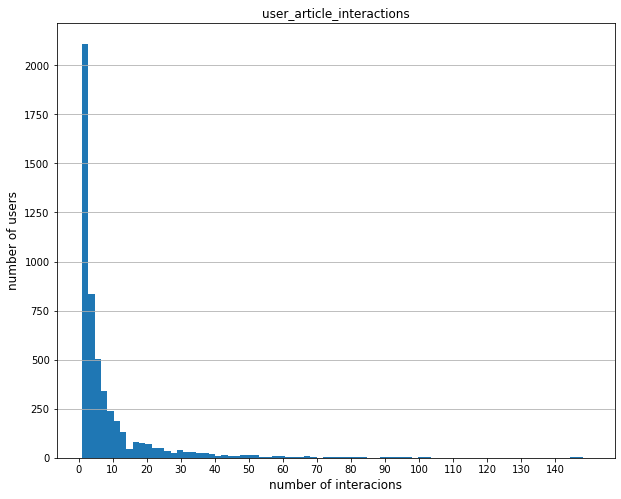

In [12]:
user_article_inter=df["email"].value_counts()
fig,ax=plt.subplots(figsize=(10,8))
ax.set_xticks(np.arange(0,150,10));
ax.grid(which="major",axis="y")
ax.set_title("user_article_interactions")

plt.xlabel("number of interacions",fontsize=12)
plt.ylabel("number of users",fontsize=12)

ax.hist(user_article_inter,bins=80,range=(1,150));

In [13]:
#没有去重每个文章互动次数
df.groupby(["article_id"]).size().reset_index(name='counts').sort_values(by="counts",ascending=False).head(20) 

,article_id,counts
699,1429,937
625,1330,927
701,1431,671
697,1427,643
652,1364,627
614,1314,614
600,1293,572
526,1170,565
518,1162,512
608,1304,483


In [14]:
#去重后用户互动文章量统计
df.drop_duplicates().groupby(["email"]).size().describe()  

count    5148.000000
mean        6.540210
std         9.990676
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       135.000000
dtype: float64

用户参与互动文章的统计，去掉相同文章的计数，发现平均每个用户互动6篇文章，用户最多的互动了135篇文章，少数非常活跃，中位数是3篇文章

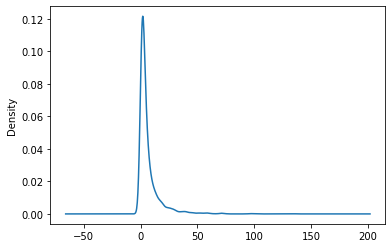

In [15]:
df.drop_duplicates().groupby(["email"]).size().plot(kind="kde")

In [16]:
# df.drop_duplicates().groupby(["email"]).agg(['count'])#另一种方式结果一样

In [17]:
#去重后，文章有多少不同用户互动
df.drop_duplicates().groupby(["article_id"]).size().describe() 

count    714.000000
mean      47.173669
std       65.467790
min        1.000000
25%        7.000000
50%       21.500000
75%       59.000000
max      467.000000
dtype: float64

In [18]:
#建立交叉表，统计每个用户对于不同文章分别互动次数
table = pd.pivot_table(df, values='title', index=['email'],
                    columns=['article_id'], aggfunc=np.count_nonzero) 

In [19]:
table

article_id,0,2,4,8,9,12,14,15,16,18,...,1434,1435,1436,1437,1439,1440,1441,1442,1443,1444
email,,,,,,,,,,,,,,,,,,,,,
0000b6387a0366322d7fbfc6434af145adf7fed1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001055fc0bb67f71e8fa17002342b256a30254cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00148e4911c7e04eeff8def7bbbdaf1c59c2c621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001a852ecbd6cc12ab77a785efa137b2646505fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001fc95b90da5c3cb12c501d201a915e4f093290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffc6cfa435937ca0df967b44e9178439d04e3537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffc96f8fbb35aac4cb0029332b0fc78e7766bb5d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffe3d0543c9046d35c2ee3724ea9d774dff98a32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Fill in the median and maximum number of user_article interactios below

median_val = df.drop_duplicates().groupby(["email"]).size().median() # 50% of individuals interact with ____ number of articles or fewer.
max_views_by_user =df.groupby(["email"]).size().max()  # The maximum number of user-article interactions by any 1 user is ______.

`2.` 发现并移除 **df_content** dataframe 中的重复文章。

In [21]:
df_content['doc_body']=df_content['doc_body'].str.lower().str.strip
df_content['doc_description']=df_content['doc_description'].str.lower().str.strip
df_content['doc_full_name']=df_content['doc_full_name'].str.lower().str.strip

In [22]:
# Find and explore duplicate articles
df_content.duplicated().value_counts()

False    1051
True        5
dtype: int64

In [23]:
df_content[df_content.duplicated()]

,doc_body,doc_description,doc_full_name,doc_status,article_id
365,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42B237B8>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF6A0>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF940>>,Live,50
692,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42B237B8>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF6A0>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF940>>,Live,221
761,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42B237B8>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF6A0>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF940>>,Live,398
970,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42B237B8>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF6A0>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF940>>,Live,577
971,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42B237B8>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF6A0>>,<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x0000017C42AFF940>>,Live,232


In [24]:
# Remove any rows that have the same article_id - only keep the first
df_content=df_content.drop_duplicates()

In [25]:
#检查是否已经去重
df_content.duplicated().value_counts() 

False    1051
dtype: int64

In [26]:
#查看空值，可以不用处理
# df_content.isnull.sum()
# df_content[df_content.isnull().T.any()]
#df_content["doc_description"].isnull().value_counts()

`3.` 在以下单元格中查找：

**a.**用户与之互动的唯一文章数量。  
**b.**数据集中的唯一文章数量（无论用户是否与之互动了）。<br>
**c.**数据集中的唯一用户数量。（不包括空值）<br>
**d.**数据集中的用户-文章互动次数。

In [27]:
unique_articles =len(list(df['article_id'].unique()))# The number of unique articles that have at least one interaction
total_articles = len(list(df_content['article_id'].unique()))# The number of unique articles on the IBM platform
user_article_interactions =df.shape[0] # The number of user-article interactions
df1 = df.dropna(subset=["email"])
unique_users =len(list(df1['email'].unique()))  # The number of unique users
unique_articles
total_articles
user_article_interactions
unique_users

714

1051

45993

5148

`4.` 在以下单元格中查找查看次数最多的文章的 **article_id**，以及被查看频率。在与公司领导讨论后，`email_mapper` 函数被视为将用户映射到 ID 的合理方式。有少数几个空值，并且所有这些空值都可能属于一个用户（我们以这种方式使用以下函数存储了这些值）。

In [28]:
df.article_id.value_counts().head()

1429    937
1330    927
1431    671
1427    643
1364    627
Name: article_id, dtype: int64

In [29]:
most_viewed_article_id =str(1429.0) # The most viewed article in the dataset as a string with one value following the decimal 
max_views =937 # The most viewed article in the dataset was viewed how many times?

In [30]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430,"using pixiedust for fast, flexible, and easier data analysis and experimentation",1
1,1314,healthcare python streaming application demo,2
2,1429,use deep learning for image classification,3
3,1338,ml optimization using cognitive assistant,4
4,1276,deploy your python model as a restful api,5


In [31]:
#检查空值是否处理
df['user_id'].isnull().value_counts()

False    45993
Name: user_id, dtype: int64

In [32]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


In [33]:
#一共45993次互动，5149个用户， 总共1051篇文章， 714篇文章互动过
df.info()
len(list(df['user_id'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  45993 non-null  object
 1   title       45993 non-null  object
 2   user_id     45993 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


5149

### <a class="anchor" id="Rank">第二部分：基于排名的推荐方法</a>

与之前的课程不同，我们没有关于用户是否喜欢某篇文章的评分。我们只知道用户与文章互动了。在这些情形下，文章的热门程度只能通过用户与文章的互动频率来判断。

`1.` 填写以下函数，使其返回前 **n** 篇文章，按照互动次数从高到低排序。使用以下测试测试你的函数。

In [34]:
df.groupby(["title"]).size().reset_index(name='counts').sort_values(by="counts",ascending=False)[:10]

,title,counts
637,use deep learning for image classification,937
396,insights from new york car accident reports,927
668,visualize car data with brunel,671
650,"use xgboost, scikit-learn & ibm watson machine learning apis",643
485,predicting churn with the spss random tree algorithm,627
356,healthcare python streaming application demo,614
323,finding optimal locations of new store using decision optimization,572
151,"apache spark lab, part 1: basic concepts",565
133,analyze energy consumption in buildings,512
345,gosales transactions for logistic regression model,483


In [35]:
df.groupby(["article_id"]).size().reset_index(name='counts').sort_values(by="counts",ascending=False)[:10]

,article_id,counts
699,1429,937
625,1330,927
701,1431,671
697,1427,643
652,1364,627
614,1314,614
600,1293,572
526,1170,565
518,1162,512
608,1304,483


In [36]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    
    return df[df.article_id.isin(get_top_article_ids(n, df))].title.unique().tolist() # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    top_articles=df.groupby(["article_id"]).size().reset_index(name='counts').sort_values(by="counts",ascending=False)["article_id"][:n].tolist()
    
    return top_articles # Return the top article ids

In [37]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['healthcare python streaming application demo', 'use deep learning for image classification', 'apache spark lab, part 1: basic concepts', 'predicting churn with the spss random tree algorithm', 'analyze energy consumption in buildings', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'gosales transactions for logistic regression model', 'insights from new york car accident reports', 'finding optimal locations of new store using decision optimization']
[1429, 1330, 1431, 1427, 1364, 1314, 1293, 1170, 1162, 1304]


In [38]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">第三部分：基于用户-用户的协同过滤</a>


`1.` 使用以下函数调整 **df** dataframe 的形状，使行表示用户，并使列表示文章。  

* 每个**用户**只能在每**行**中出现一次。


* 每篇**文章**只能在每**列**中出现一次。  


* **如果用户与某篇文章互动了，则在该文章所在的列与用户行形成的单元格中填充 1**。无论用户与文章互动了多少次，都填充 1。  


* **如果用户与文章没有互动，则在该文章所在的列与用户行形成的单元格中填充 0**。 

使用以下测试检验矩阵的基本结构是否与解答中的结构一致。

In [39]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
#     '''
#     INPUT:
#     df - pandas dataframe with article_id, title, user_id columns
    
#     OUTPUT:
#     user_item - user item matrix 
    
#     Description:
#     Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
#     an article and a 0 otherwise
#     '''
    user_item= pd.pivot_table(df, values='title', index=['user_id'],
                    columns=['article_id'], aggfunc=np.count_nonzero)
    user_item=user_item.fillna(0)
    m=user_item<1
    user_item.where(m, 1,inplace=True)
    
#     user_item=user_item.as_matrix()
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [40]:
user_item.shape

(5149, 714)

In [41]:
user_item

article_id,0,2,4,8,9,12,14,15,16,18,...,1434,1435,1436,1437,1439,1440,1441,1442,1443,1444
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` 完成以下函数，该函数应该接受 user_id，并提供与该用户最相似的有序用户列表（从最相似到最不相似）。返回的列表不应包含提供的 user_id，因为我们知道每个用户都与其本身相似。因为每个用户的结果是二元的，所以建议用两个用户的点积表示相似性。 

使用测试测试你的函数。

In [43]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    
    # compute similarity of each user to the provided user
    scores = user_item.dot(user_item.loc[user_id]) 
    
    # sort by similarity and emove the own user's id
    most_similar_users = scores.sort_values(ascending=False).drop(user_id).index.tolist()
    
    return most_similar_users

In [44]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 4459, 203]
The 3 most similar users to user 46 are: [4201, 23, 3782]


`3.` 创建了为每个用户提供最相似用户的函数后，你需要使用这些用户查找可以推荐的文章。完成以下函数，以返回向每个用户推荐的文章。

In [45]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_names = df[df["article_id"].isin(article_ids)]["title"].unique().tolist()
    
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    article_ids = user_item.loc[user_id][user_item.loc[user_id]==1].index.values
    article_names=get_article_names(article_ids)

    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    article_read =  list(get_user_articles(user_id)[0])
    closest_neighbors = find_similar_users(user_id)
    
    # Keep the recommended articles here
    recs = []
    
    # Go through the neighbors and identify movies they like the user hasn't seen
    for neighbor in closest_neighbors:
        neighbs_likes =  list(get_user_articles(neighbor)[0])
        
        #Obtain recommendations for each neighbor
        new_recs = list(set(neighbs_likes).difference(set(article_read)))
        # Update recs with new recs
        recs = list(set(recs+new_recs))
        
        # If we have enough recommendations exit the loop
        if len(recs) > m-1:
            break
    
    recs= recs[:m]
   
    return recs # return your recommendations for this user_id    

In [46]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['got zip code data? prep it for analytics. – ibm watson data lab – medium',
 'timeseries data analysis of iot events by using jupyter notebook',
 'shaping data with ibm data refinery',
 'deep forest: towards an alternative to deep neural networks',
 'this week in data science (april 18, 2017)',
 'higher-order logistic regression for large datasets',
 'data tidying in data science experience',
 'using machine learning to predict parking difficulty',
 'data science platforms are on the rise and ibm is leading the way',
 'a tensorflow regression model to predict house values']

In [47]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names([1024, 1176, 1305, 1314, 1422, 1427])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names([1320, 232, 844])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set([1320, 232, 844])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set([1024, 1176, 1305, 1314, 1422, 1427])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` 现在我们将提高上述 **user_user_recs** 函数的一致性。  

* 当所有用户与给定用户的邻近程度都一样时，我们并非随意选择用户，而是先选择总互动次数最多的用户，然后选择互动次数第二多的用户。


* 当推荐的文章数量以低于 m 的数字开始并以高于 m的数字结束时，我们并非随意选择文章，而是先选择总互动次数最多的文章，然后选择总互动次数第二多的文章。你可以利用之前编写的 **top_articles** 函数获得这种排名。

In [48]:
#根据用户id返回该用户互动总次数
def inter_nums(user_id):
    df_user=df.groupby(["user_id"]).size().reset_index(name='counts').sort_values(by="counts",ascending=False)
    counts=df_user.loc[df_user["user_id"]==user_id]["counts"].values.item()
    return counts

In [49]:
#根据文章id返回该文章被互动总次数
def read_nums(article_id):
    df_article=df.groupby(["article_id"]).size().reset_index(name='counts').sort_values(by="counts",ascending=False)
    counts=df_article.loc[df_article["article_id"]==article_id]["counts"].values.item()
    return counts

In [50]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    
    colName=['neighbor_id', 'similarity', 'num_interactions']
    neighbors_df=pd.DataFrame(columns= colName)
    # compute similarity of each user to the provided user
    smi_user={}
    to_compare_user=user_item.shape[0]
    for id_ in range(1,to_compare_user):
        smi_user[id_]=np.dot(user_item.loc[user_id],user_item.loc[id_])
        
    neighbors_df["neighbor_id"]=[x[0] for x in smi_user.items()]
    neighbors_df["similarity"]=[x[1] for x in smi_user.items()]
    neighbors_df["num_interactions"]= neighbors_df["neighbor_id"].apply(inter_nums)
    # sort by similarity
    neighbors_df=neighbors_df.sort_values(by=["similarity","num_interactions"],ascending=False)
    neighbors_df.drop(neighbors_df.loc[user_id],inplace=True)
   
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    neighbors_df = get_top_sorted_users(user_id)
    user_article_ids, _= get_user_articles(user_id)
    user_article_ids = [np.float(x) for x in user_article_ids]
    recs =[]    
    for neighbor_id in neighbors_df['neighbor_id']:
        if len(recs)<m:
            neighbor_article_ids, _ = get_user_articles(neighbor_id)
            new_recs = np.setdiff1d(neighbor_article_ids, user_article_ids, assume_unique=True)
            recs = np.append(recs,new_recs)            
            recs = np.unique(recs)
        else:
            break              
    recs = recs[:m]        
    rec_names = get_article_names(recs)    
    return recs, rec_names

In [51]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
[ 12. 109. 125. 142. 164. 205. 302. 336. 362. 465.]

The top 10 recommendations for user 20 are the following article names:
['timeseries data analysis of iot events by using jupyter notebook', 'dsx: hybrid mode', 'accelerate your workflow with dsx', 'learn tensorflow and deep learning together and now!', "a beginner's guide to variational methods", 'tensorflow quick tips', 'challenges in deep learning', 'neural networks for beginners: popular types and applications', 'statistics for hackers', 'introduction to neural networks, advantages and applications']


`5.` 请利用上述函数正确填写以下字典。然后对照解答检验该字典。按照以下注释提供必要的代码。

In [52]:
### Tests with a dictionary of results

user1_most_sim =find_similar_users(1)[0] # Find the user that is most similar to user 1 
user131_10th_sim =find_similar_users(131)[9] # Find the 10th most similar user to user 131

In [53]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` 如果是新用户，你可以使用上述哪个函数做出推荐？请解释。你能想到更好的推荐方法吗？在以下单元格中解释向新用户做出推荐的更好方法。

**可以使用基于互动热度的推荐函数get_top_article_ids，返回互动频次最多的文章进行推荐。我考虑还可以通过以下方法推荐给新用户：  
1，定义每个文章被不同用户互动的次数为受欢迎度，依据总的受欢迎度选取文章推荐给新用户。  
2，按照所有用户互动频率分5个级别，即分为5个群体小组，根据组内受欢迎度每组选取两个文章，将这10篇文章推荐给新用户。如果某文章在多个组内均被选中，则只选中最受欢迎组中的一次，其他组忽略。  
3，根据新用户的注册时间、访问时间、或者邮箱地址等特征，找到用户群体相似度高的，推荐这批用户最受欢迎的文章，可以使互动次数最多的也可以是欢迎度最高的。**

`7.` 利用现有函数向以下新用户提供前 10 篇推荐文章。你可以对照我们的解答测试你的函数，确保在如何做出推荐方面与我们的想法一致。

In [54]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10)# Your recommendations here



In [55]:
assert set(new_user_recs) == set([1314,1429,1293,1427,1162,1364,1304,1170,1431,1330]), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">第四部分：基于内容的推荐方法（选修内容）</a>

另一种推荐方法是对与某个术语相关的文章进行从高到低排名。内容可以是 **doc_body**、**doc_description** 或**doc_full_name**。创建基于内容的推荐系统并非只有一种方式，尤其是考虑到每列都包含与内容相关的信息。  

`1.` 使用以下函数主体创建一个基于内容的推荐系统。由于这个推荐系统的正确答案不止一个，所以没有提供测试函数。如果你想尝试一种需要更多输入值的方法，可以更改函数输入。当前的输入值考虑到了你可能会使用基于内容的推荐方法。此外，你可能会使用满足“内容标准”的最热门推荐方法，总之，你在做出这些推荐时可以灵活选择方法。

### 这部分并非通过项目必须完成的任务。但是，你可以借机展示你的技能。

In [56]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` 你已经创建了基于内容的推荐系统，接着在以下单元格中简要说明下这一基于内容的推荐系统是如何运行的。你觉得你的函数有哪些值得改进的地方吗？这一基于内容的推荐系统有什么新奇的地方吗？

### 这部分并非通过项目必须完成的任务。但是，你可以借机展示你的技能。

**在此处解释下这一基于内容的推荐系统。**

`3.` 根据注释使用这一基于内容的推荐系统对以下情形做出推荐。我们没有提供测试，因为在创建此基于内容的推荐系统时，可以有多个正确答案。

### 这部分并非通过项目必须完成的任务。但是，你可以借机展示你的技能。

In [57]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">第五部分：矩阵分解</a>

在此部分，你将利用矩阵分解向 IBM Watson Studio 平台上的用户推荐文章。

`1.` 你在上述**第三部分**的**第一个问题**中已经创建了 **user_item** 矩阵。接下来的第一个问题需要你运行单元格，为**第五部分**的其他步骤做好准备。

In [58]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [59]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` 在此部分，你可以对用户-项目矩阵运用[numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) 的奇异值分解方法。在单元格中执行 SVD，并解释为何与课程中的步骤不一样。

In [60]:
# Perform SVD on the User-Item Matrix Here

u, s, vt =np.linalg.svd(user_item_matrix) # use the built in to get the three matrices

**因为该矩阵没有空值，可以直接进行奇异值分解计算。**

`3.` 如何确定潜在特征的数量？这个问题比较难。运行以下单元格后你会发现，随着潜在特征数量的增加，用户-项目矩阵中 1 和 0 值的预测错误率会降低。运行以下单元格，了解当潜在特征的数量增加时，准确率会如何提高。

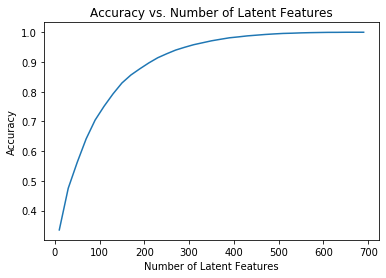

In [61]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

**准确率随着特征数量增加，逐渐提高，但是在特征数量增加到400以后，提速减慢，达到95%以上，渐渐趋于平缓。**

`4.` 通过上述单元格，我们无法判断要使用多少个潜在特征，因为能够更好地预测矩阵的 1 和 0 值，并不表明我们就能做出很好的推荐。我们可以将数据集划分为训练集和测试集，如以下单元格所示。  

根据第三个问题的代码判断，不同的潜在特征数量对训练集和测试集的准确率有何影响。使用以下划分方法： 

* 我们可以对测试集中的多少个用户做出预测？  
* 由于冷启动问题，我们无法对多少个用户做出预测？
* 我们可以对测试集中的多少篇文章做出预测？  
* 由于冷启动问题，我们无法对多少篇文章做出预测？

In [62]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    
    test_idx = user_item_test.index.unique().tolist()
    test_arts = user_item_test.columns.tolist()
    
    
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [63]:
np.intersect1d(user_item_test.index, user_item_train.index).size

20

In [64]:
len(set(user_item_test.index) - set(user_item_train.index))

662

In [65]:
np.intersect1d(user_item_test.columns, user_item_train.columns).size

574

In [66]:
len(set(user_item_test.columns) - set(user_item_train.columns))

0

In [67]:
# Replace the values in the dictionary below
a= 662
b= 574
c= 20
d= 0


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c ,# letter here, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a ,# letter here, 
    'How many articles can we make predictions for in the test set?':b ,# letter here,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?':d # letter here
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test movies are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` 现在对上述 **user_item_train** 数据集进行奇异值分解，并得出 U、S 和 V 转置矩阵。然后判断在使用不同的潜在特征数量时，可以使用此矩阵分解方法对 **user_item_test** 数据集中的多少行做出预测，并根据测试数据的准确率确定应该保留多少个潜在特征。这个问题需要运用在第 `2` - `4`.个问题中完成的步骤。

通过以下单元格了解 SVD 在测试数据上做出推荐预测的效果如何。

In [68]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = np.linalg.svd(np.array(user_item_train, dtype='int'), full_matrices=False)# fit svd similar to above then use the cells below

In [69]:
u_train.shape, s_train.shape, vt_train.shape

((4487, 714), (714,), (714, 714))

In [70]:
u_test = u_train[user_item_train.index.isin(test_idx), :]
vt_test = vt_train[:, user_item_train.columns.isin(test_arts)]
u_test.shape, vt_test.shape

((20, 714), (714, 574))

In [71]:
#查看根据训练集，测试集有多少在测试集出现过的行、列可以被预测。
test_users = set(user_item_train.index) & set(user_item_test.index)
test_articles = set(user_item_train.columns) & set(user_item_test.columns)
user_item_test_predicable = user_item_test.loc[test_users, test_articles]

In [72]:
user_item_test_predicable.shape

(20, 574)

In [73]:
num_latent_feats = np.arange(10,700+10,20)

sum_errs_train = []
sum_errs_test = []

f1_train = []
f1_test = []

for k in num_latent_feats:
    # restructure with k latent features
    s_train_new, u_train_new, vt_train_new = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_new, vt_test_new = u_test[:, :k], vt_test[:k, :]
    
    # take dot product
    user_item_train_est = np.around(np.dot(np.dot(u_train_new, s_train_new), vt_train_new))
    user_item_test_est = np.around(np.dot(np.dot(u_test_new, s_train_new), vt_test_new))
    
    # compute error for each prediction to actual value
    diffs_train = np.subtract(user_item_train, user_item_train_est)
    diffs_test = np.subtract(user_item_test_predicable, user_item_test_est)
    
    # total errors and keep track of them
    sum_errs_train.append(np.sum(np.sum(np.abs(diffs_train))))
    sum_errs_test.append(np.sum(np.sum(np.abs(diffs_test))))
    
    # compute f1 score (macro) for each prediction to actual value
    f1_train.append(f1_score(np.array(user_item_train).flatten(), user_item_train_est.flatten(), labels=[1.0], average='macro'))
    f1_test.append(f1_score(np.array(user_item_test_predicable).flatten(), user_item_test_est.flatten(), labels=[1.0], average='macro'))

Text(0.5, 1.0, 'Accuracy vs. Number of Latent Features')

Text(0.5, 0, 'Number of Latent Features')

Text(0, 0.5, 'Train accuracy')

Text(0, 0.5, 'Test accuracy')

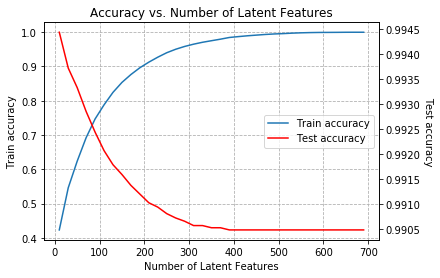

In [74]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(num_latent_feats, 1 - np.array(sum_errs_train)/df.shape[0], label="Train accuracy")
ax2.plot(num_latent_feats, 1 - np.array(sum_errs_test)/df.shape[0], color='red', label="Test accuracy")

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1+handler2, label1+label2, loc='center right')

ax1.set_title('Accuracy vs. Number of Latent Features')
ax1.grid(linestyle='--')

ax1.set_xlabel('Number of Latent Features')
ax1.set_ylabel('Train accuracy')
ax2.set_ylabel('Test accuracy', rotation=270, labelpad=12)

plt.show()

Text(0.5, 1.0, 'F1 score (macro) vs. Number of Latent Features')

Text(0.5, 0, 'Number of Latent Features')

Text(0, 0.5, 'Train f1 score (macro)')

Text(0, 0.5, 'Test f1 score (macro)')

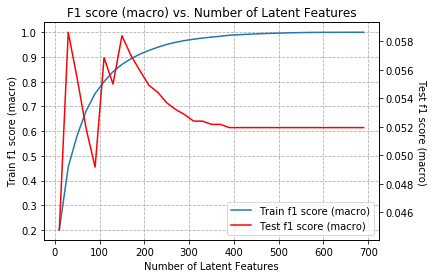

In [75]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(num_latent_feats, f1_train, label='Train f1 score (macro)')
ax2.plot(num_latent_feats, f1_test, color='red', label='Test f1 score (macro)')

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1+handler2, label1+label2, loc='lower right')

ax1.set_title('F1 score (macro) vs. Number of Latent Features')
ax1.grid(linestyle='--')

ax1.set_xlabel('Number of Latent Features')
ax1.set_ylabel('Train f1 score (macro)')
ax2.set_ylabel('Test f1 score (macro)', rotation=270, labelpad=12)

plt.show()

`6.` 在以下单元格中解释上个问题的结果。根据你得出的结果，讨论下你会如何判断上述推荐系统是否比用户目前查找文章的方式更好。 

**1，通过比较训练集测试集共同包含的行、列，得到通过训练集矩阵分解的模型可以预测的测试集元素中的20 行。所以SVD对于很多训练集中没有的用户或者电影是无法预测的，需要采用其他方式。
2，如果按准确率比较，测试集的准确率表现不太好，随着特征数量的增加，测试集的准确率逐渐降低，如果从训练、测试整体的角度考虑，可以选择90个特征，这样测试集和训练集可以都达到0.7以上的准确率。但是考虑到矩阵非常稀疏，很多用户文章并没有互动，数据分布不平衡，所以准确率不是很好的衡量推荐效果的依据，所以可以考虑f1分数。  
3，通过比较模型训练的f1分数，可以知道在170个特征的时候，训练集和测试集的总体表现达到最好，可以达到0.9分。超过170个特征数量后，测试集的得分开始降低，说明模型出现过拟合。  
4，除了以上两种方式，还可以通过在线A/B测试比较推荐效果。
5，为了优化推荐系统，除了以上推荐模型外，建议可以收集用户在线时间、文章页面停留时间、文章发布时间等其他信息，通过多种特征信息，能够提取更加细致的模型，提高推荐效果**

<a id='conclusions'></a>
### 其他内容
你现在可以保存为每个用户推荐的文章，开发一个类来作出新的预测并更新结果，以及创建一个部署结果的应用。这些任务并不是此项目必须完成的任务。但是，在学完课程知识后，你肯定能够继续完成这些任务并改进你的项目。


## 总结

> 恭喜！你已经完成 IBM 推荐系统项目。 

